# Network Costs
The cost of the network can easily get complex. What we do here is start with a simple model, discuss its shortcomings, and possible routes to improve the model. The goal is to compare the network costs as a function of number of users $N>=1$ against demand side economies of scale.

## Simple model
Assumptions:
* Users are evenly distributed in space in a grid with population density $\rho$
* One user is located at the same node as the power source (zero line length connecting that user to the source), and power is distributed radially.
* Costs are the distribution lines, which have some cost per unit lenth $p_l$ and connection costs which have some cost per customer $p_n$. The cost of the distribution lines are the sum of the costs of the conductor $p_{l,c}$, power poles $p_{l,p}$, and pole-top hardware $p_{l,t}$. We assume that power poles are installed at a fixed number per length of conductor, ignoring requirements at the beginning and end of lines, for bends in the line, for service drops, and we assume that the length of the conductor connects all households (potentially in multiple branches), ignoring vertical distances.
* The fixed costs per user include meter $p_{n,m}$ and protection $p_{n,p}$. For $N=1$, it is debatable whether a meter need be installed in a stand-alone system, and requires further analysis to what extent the protection system would need to be different. It is likely that some smart meter would be installed for pre-pay stand-alone systems, but the protection and control would likely be different. For now, we assume it is the same.
* We assume a constant conductor diameter, single phase lines, and neglect circuit protection and connection costs for laterals. This is implicitly neglecting the fact that as the network gets larger, larger conductors are needed closer to the source to conduct more current, and/or that transformers and multi-phase systems would be used.

The costs we assume are:
* Conductor: $p_{l,c}=\$2/m$ approximate for positive plus neutral 6 AWG aluminum conductor
* Pole: $p_{l,p}=\$1/m$ which is \$50 per pole and 1 pole per 50 m.
* Pole-top hardware: $p_{l,t}=\$0.1/m$ which is \$10 per pole and 1 pole per 50 m.
* Meter: $p_{n,m}=\$50$ per user
* Protection: $p_{n,p}=\$10$ per user

So the total cost per meter of line and per user are $p_l=\$3.1/m=\$310/100m$ and $p_n=\$60$ per user.

We look at population densities in the range of $\rho\in[1,100]$ users (structures) per hectare, or from 1e-4 to 1e-2 users per square meter.

### Cost derivation:
With the assumptions above, every user except for the one at the power station contributes a length $l$ to the total length $L$, so $L=(N-1)l$. The length $l$ is given by the area divided by the number of users along one side of the square population: $l=\frac{\sqrt{A}}{\sqrt{N}}=\frac{1}{\sqrt{\rho}}$. So then the total line length is $L=\frac{N-1}{\sqrt{\rho}}$. The total line cost is $C_l=Lp_l$, and the average line cost per user is $\bar{C_l}=\frac{C_l}{N}=\frac{Lp_l}{N}=\frac{p_l(1-\frac{1}{N})}{\sqrt{\rho}}$. We can see that as $N\rightarrow\infty$, $\bar{C_l}\rightarrow\frac{p_l}{\sqrt{\rho}}$.

The average cost per user from meter and protection is just the per user cost $\bar{C_n}=p_n$.

So the average total network cost per user is $\bar{C}=\bar{C_l}+\bar{C_n}=\frac{p_l(1-\frac{1}{N})}{\sqrt{\rho}}+p_n$


<IPython.core.display.Javascript object>


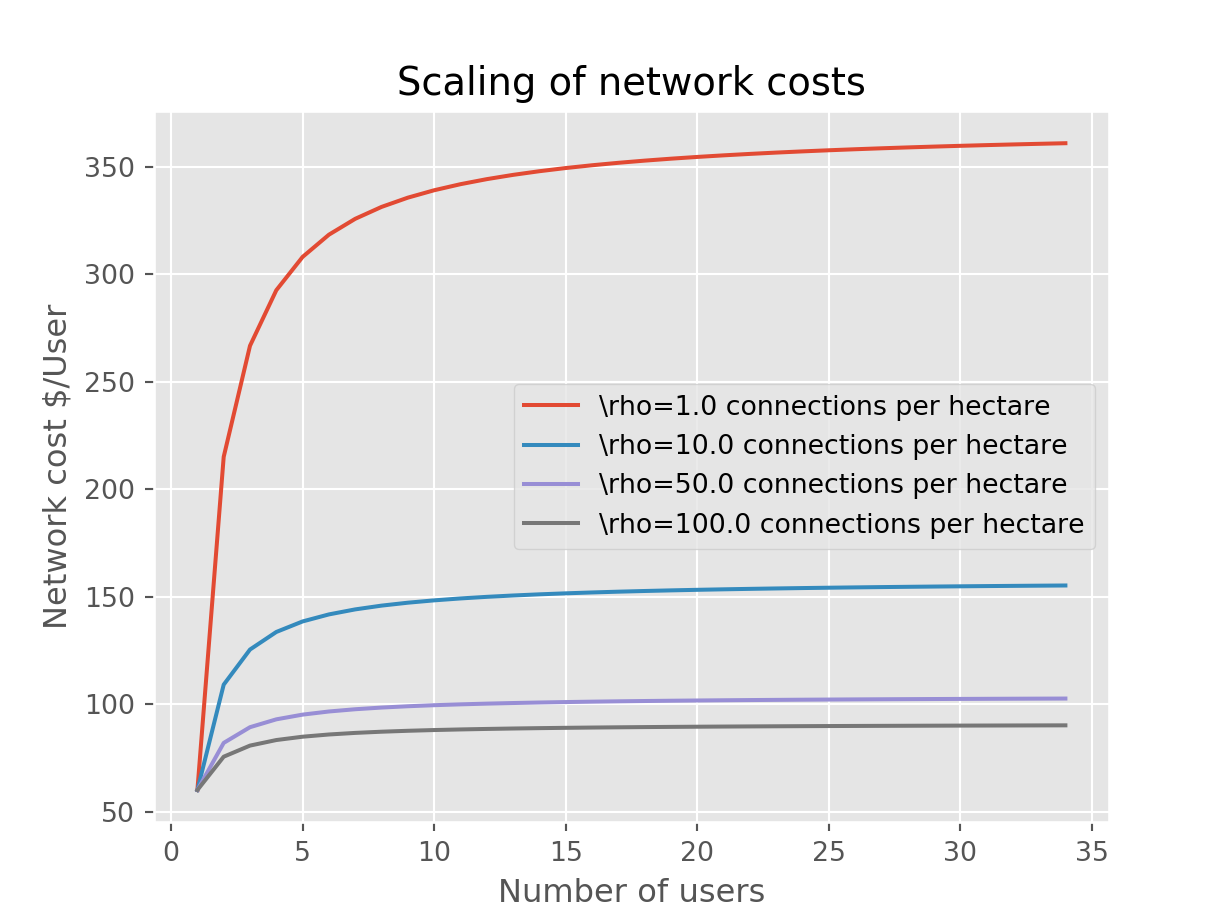

In [8]:
%matplotlib notebook
import math
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

p_lc = 2;
p_lp = 1;
p_lt = 0.1;
p_nm = 50;
p_np = 10;

p_l = p_lc+p_lp+p_lt;
p_n = p_nm+p_np;

C_fun = lambda N, rho : (p_l*(1-1/N))/(math.sqrt(rho))+p_n;

rho_samples = [0.0001, 0.001, 0.005, 0.01]
N_samples = np.arange(1, 35)
C = np.zeros((len(N_samples), len(rho_samples)))

for j, rho in enumerate(rho_samples):
    for i, N in enumerate(N_samples):
        C[i, j] = C_fun(N, rho);

plt.plot(N_samples, C);
plt.legend(['\\rho={} connections per hectare'.format(rho*10000) for rho in rho_samples]);
plt.xlabel('Number of users');
plt.ylabel('Network cost $/User');
plt.title('Scaling of network costs');


### Discussion
#### Results

#### Model validity
